# Resolução da lista 3 de NLP

## Alunos:
  - Eduardo Brasil Araujo
  - Gideão Pinheiro"

### Pré-processamento lista 1

In [36]:
from __future__ import annotations
import pandas as pd
import re
import numpy as np
import string
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk import pos_tag
from nltk.tokenize import word_tokenize
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
from nltk.stem import PorterStemmer

[nltk_data] Downloading package punkt to
[nltk_data]     /home/gideaopinheiro/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/gideaopinheiro/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/gideaopinheiro/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/gideaopinheiro/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [9]:
preprocess_data = pd.read_csv('../datasets/website_classification.csv')
raw_text = preprocess_data.cleaned_website_text

In [17]:
def get_words(text: str, word_dict: dict):
    words = re.findall(r'[^ .,]+', text)
    final_words = []
    for word in words:
        to_insert = True
        if re.search(r'[0-9]', word) != None:
            to_insert = False
            
        word = word.translate(str.maketrans('', '', string.punctuation)).lower()
        
        if re.search(r'[^a-z]', word) != None:
            to_insert = False
        
        if to_insert:
            final_words.append(word)
            try:
                word_dict[word] += 1
            except:
                word_dict[word] = 0
    
    return final_words

In [11]:

def remove_stop_words(text_arr):
    stop_words = set(stopwords.words('english'))

    novo_texto =[]
    for texto in text_arr:
        texto_sem_stopwords = [palavra for palavra in texto if palavra not in stop_words]    
        novo_texto.append(texto_sem_stopwords)
    
    return novo_texto

In [12]:

def add_rotulo_pos(text_arr):  
  text_arr_pos_rotulo = [pos_tag(word_tokenize(' '.join(array))) for array in text_arr]
  return text_arr_pos_rotulo

In [13]:

def aplica_stemizacao(text_arr):  
  stemmer = PorterStemmer()
  text_array_stemmed = [[(stemmer.stem(token), pos) for token, pos in array] for array in text_arr]
  return text_array_stemmed


In [18]:
def convert_entire_database(raw_data: list[str]):
    ret_dict = {}
    ret_words = []
    for text in raw_data:
        result = get_words(text, ret_dict)
        ret_words.append(result)
    return ret_dict, ret_words
all_dict, words_per_text = convert_entire_database(raw_text)

In [19]:
novo_texto = remove_stop_words(words_per_text)
texto_com_rotulo = add_rotulo_pos(novo_texto)
texto_stemizado = aplica_stemizacao(texto_com_rotulo)
print(texto_stemizado[0])

[('offici', 'JJ'), ('site', 'NN'), ('good', 'JJ'), ('hotel', 'NN'), ('accommod', 'NN'), ('big', 'JJ'), ('save', 'VBG'), ('hotel', 'NN'), ('destin', 'NN'), ('worldwid', 'IN'), ('brows', 'JJ'), ('hotel', 'NN'), ('review', 'NN'), ('find', 'VBP'), ('guarante', 'NN'), ('good', 'JJ'), ('price', 'NN'), ('hotel', 'NN'), ('budget', 'NN'), ('lodg', 'VBG'), ('accommod', 'JJ'), ('hotel', 'NN'), ('hotel', 'NNS'), ('special', 'JJ'), ('offer', 'NN'), ('packag', 'NN'), ('special', 'JJ'), ('weekend', 'NN'), ('break', 'NN'), ('citi', 'NN'), ('break', 'NN'), ('deal', 'NN'), ('budget', 'NN'), ('cheap', 'JJ'), ('discount', 'NN'), ('save', 'VBG'), ('select', 'JJ'), ('languag', 'NN'), ('find', 'VB'), ('deal', 'JJ'), ('hotel', 'NN'), ('home', 'NN'), ('tri', 'NN'), ('search', 'NN'), ('connect', 'VBP'), ('travel', 'NN'), ('india', 'NN'), ('travel', 'NN'), ('talk', 'NN'), ('commun', 'NN'), ('recommend', 'VBP'), ('destin', 'NN'), ('flamborough', 'NN'), ('boreland', 'NN'), ('colvend', 'VBP'), ('catfield', 'VBN'), 

### Questão 1

##### Item a

In [22]:
import gensim
from gensim.models import Word2Vec
import nltk
nltk.download('punkt')
import spacy

[nltk_data] Downloading package punkt to
[nltk_data]     /home/gideaopinheiro/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [24]:
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 6.1 MB/s eta 0:00:00m eta 0:00:010:00:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [25]:
nlp = spacy.load("en_core_web_sm")

def tokenize(text):
    doc = nlp(text)
    return [token.text for token in doc]


In [26]:
corpus = [" ".join([token[0] for token in tokens]) for tokens in texto_stemizado]

In [27]:
sentences = [tokenize(text) for text in corpus]

model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, sg=0)

In [28]:
model.save("word2vec_model")

##### Item b

In [29]:
palavras_de_consulta = ["ocean", "mountain", "island", "forest", "desert"]

In [30]:
similares_por_palavra = {}

for palavra_consulta in palavras_de_consulta:
    similares = model.wv.most_similar(palavra_consulta, topn=3)
    similares_por_palavra[palavra_consulta] = [palavra for palavra, _ in similares]

In [32]:
for palavra_consulta in palavras_de_consulta:
    print(f"Palavra de consulta: {palavra_consulta}")
    palavras_semelhantes = similares_por_palavra[palavra_consulta]

    for palavra_semelhante in palavras_semelhantes:
        for idx, documento in enumerate(texto_stemizado):
            tokens = [token[0] for token in documento]
            if palavra_semelhante in tokens:
                print(f"Documento {idx}: {tokens}")


Palavra de consulta: ocean
Documento 97: ['fern', 'hotel', 'resort', 'india', 'offici', 'websit', 'onlin', 'hotel', 'book', 'award', 'win', 'chain', 'busi', 'leisur', 'hotel', 'india', 'book', 'hotel', 'room', 'directli', 'offici', 'websit', 'free', 'wifi', 'complimentari', 'buffet', 'breakfast', 'pay', 'hotel', 'exclus', 'offer', 'free', 'cancel', 'room', 'avail', 'good', 'rate', 'guarante', 'book', 'stay', 'hotel', 'india', 'busi', 'hotel', 'india', 'luxuri', 'hotel', 'india', 'leisur', 'hotel', 'india', 'secret', 'deal', 'book', 'earli', 'save', 'stay', 'long', 'stay', 'green', 'secret', 'deal', 'casino', 'packag', 'nepal', 'book', 'earli', 'save', 'stay', 'long', 'stay', 'green', 'fern', 'hotel', 'resort', 'hotel', 'locat', 'room', 'experi', 'new', 'face', 'hospit', 'miss', 'good', 'price', 'guarante', 'select', 'hotel', 'fern', 'eco', 'commit', 'fern', 'wed', 'event', 'fern', 'hotel', 'resort', 'rejuven', 'samali', 'amit', 'g', 'great', 'hotel', 'andi', 'n', 'taipei', 'taiwan', 'g

##### Item c

In [38]:
def calcular_distancia_media(palavra_consulta, lista_palavras_documento, modelo):
    try:
        vetores_palavras = [modelo.wv[palavra] for palavra in lista_palavras_documento]
        vetor_palavra_consulta = modelo.wv[palavra_consulta]

        distancias = [np.linalg.norm(vetor_palavra_consulta - vetor_palavra) for vetor_palavra in vetores_palavras]
        distancia_media = np.mean(distancias)

        return distancia_media
    except KeyError:
        return float('inf')

def buscar_documentos_similares(palavra_consulta, base_documentos, modelo):
    resultados = {}

    for idx, documento in enumerate(base_documentos):
        palavras_semelhantes = modelo.wv.most_similar(palavra_consulta, topn=10)
        palavras_semelhantes = [palavra for palavra, _ in palavras_semelhantes]
        
        distancia_media = calcular_distancia_media(palavra_consulta, palavras_semelhantes, modelo)
        resultados[idx] = distancia_media

    documentos_similares = sorted(resultados.items(), key=lambda x: x[1])

    documentos_top3 = documentos_similares[:3]

    return documentos_top3


##### Item d

In [39]:
for palavra_consulta in palavras_de_consulta:
    print(f"Palavra de consulta: {palavra_consulta}")
    
    documentos_proximos = buscar_documentos_similares(palavra_consulta, texto_stemizado, model)
    
    for idx, distancia_media in documentos_proximos:
        print(f"Documento {idx}: Distância Média = {distancia_media}")
        print(texto_stemizado[idx])
        print("------------------------")


Palavra de consulta: ocean


Documento 0: Distância Média = 3.727816343307495
[('offici', 'JJ'), ('site', 'NN'), ('good', 'JJ'), ('hotel', 'NN'), ('accommod', 'NN'), ('big', 'JJ'), ('save', 'VBG'), ('hotel', 'NN'), ('destin', 'NN'), ('worldwid', 'IN'), ('brows', 'JJ'), ('hotel', 'NN'), ('review', 'NN'), ('find', 'VBP'), ('guarante', 'NN'), ('good', 'JJ'), ('price', 'NN'), ('hotel', 'NN'), ('budget', 'NN'), ('lodg', 'VBG'), ('accommod', 'JJ'), ('hotel', 'NN'), ('hotel', 'NNS'), ('special', 'JJ'), ('offer', 'NN'), ('packag', 'NN'), ('special', 'JJ'), ('weekend', 'NN'), ('break', 'NN'), ('citi', 'NN'), ('break', 'NN'), ('deal', 'NN'), ('budget', 'NN'), ('cheap', 'JJ'), ('discount', 'NN'), ('save', 'VBG'), ('select', 'JJ'), ('languag', 'NN'), ('find', 'VB'), ('deal', 'JJ'), ('hotel', 'NN'), ('home', 'NN'), ('tri', 'NN'), ('search', 'NN'), ('connect', 'VBP'), ('travel', 'NN'), ('india', 'NN'), ('travel', 'NN'), ('talk', 'NN'), ('commun', 'NN'), ('recommend', 'VBP'), ('destin', 'NN'), ('flamborough', 'NN'), ('boreland',

# Question 3

In [1]:
from tensorflow import keras
from tensorflow.keras import layers

import numpy as np
import random

import pandas as pd

In [2]:
lstm_data = pd.read_csv('../datasets/preprocessed_website_classification.csv')
lstm_raw_data = lstm_data.cleaned_website_text

In [3]:
random.seed(123)
lstm_raw_data = random.sample(lstm_raw_data.to_list(), 240)

In [4]:
corpus = ''
for data in lstm_raw_data:
    corpus += f'{data} '

print('Corpus length:', len(corpus))

Corpus length: 1245935


In [5]:
chars = sorted(list(set(corpus)))
print('Total chars:', len(chars))

Total chars: 27


In [6]:
char_indices = dict((c, i) for i, c in enumerate(chars))
indices_char = dict((i, c) for i, c in enumerate(chars))

In [7]:
sentences = []
next_chars = []
Q = 10
for i in range(0, len(corpus) - Q, 3):
    sentences.append([char_indices[char] for char in corpus[i : i + Q]])
    next_chars.append(char_indices[corpus[i + Q]])

print('Number of sequences:', len(sentences))

Number of sequences: 415309


In [8]:
x = np.zeros((len(sentences), Q, len(chars)), dtype=bool)
y = np.zeros((len(sentences), len(chars)), dtype=bool)
for i, sentence in enumerate(sentences):
    for t, char in enumerate(sentence):
        x[i, t, char] = 1
    y[i, next_chars[i]] = 1

In [9]:
model = keras.Sequential(
    [
        keras.Input(shape=(Q, len(chars))),
        layers.LSTM(128),
        layers.Dense(len(chars), activation='softmax'),
    ]
)
optimizer = keras.optimizers.RMSprop(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer)

In [10]:
def sample(preds, temperature=1.0):
    # helper function to sample an index from a probability array
    preds = np.asarray(preds).astype("float64")
    preds = np.log(preds) / temperature
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    probas = np.random.multinomial(1, preds, 1)
    return np.argmax(probas)

In [11]:
def generate_text(model, sentence, diversity, num):
    generated = ''
    for _ in range(num):
        x_pred = np.zeros((1, Q, len(chars)))
        for t, char in enumerate(sentence):
            x_pred[0, t, char_indices[char]] = 1.0
        preds = model.predict(x_pred, verbose=0)[0]
        next_index = sample(preds, diversity)
        next_char = indices_char[next_index]
        sentence = sentence[1:] + next_char
        generated += next_char
    
    return generated  

In [12]:
epochs = 40
batch_size = 2048

for epoch in range(epochs):
    model.fit(x, y, batch_size=batch_size, epochs=1)
    print()
    print(f"Generating text after epoch: {epoch}")

    start_index = random.randint(0, len(corpus) - Q - 1)
    for diversity in [0.2, 0.5, 1.0, 1.2]:
        print("...Diversity:", diversity)
        
        sentence = corpus[start_index : start_index + Q]
        print(f'...Generating with seed: "{sentence}"')

        generated = generate_text(model, sentence, diversity, 50)

        print("...Generated: ", generated)
        print()

203/203 [==============================] - 42s 197ms/step - loss: 2.4768

Generating text after epoch: 0
...Diversity: 0.2
...Generating with seed: "vic februa"
...Generated:   contin treat precip conter conder conter super co

...Diversity: 0.5
...Generating with seed: "vic februa"
...Generated:  r portect buti buil form tound fete luspoli pravid

...Diversity: 1.0
...Generating with seed: "vic februa"
...Generated:  l doornt wabicn plisur hllaverig text l tortamason

...Diversity: 1.2
...Generating with seed: "vic februa"
...Generated:  lut bolit accran prinear chialit pancas plofe wolc

203/203 [==============================] - 37s 181ms/step - loss: 2.0861

Generating text after epoch: 1
...Diversity: 0.2
...Generating with seed: "el fichaj "
...Generated:  sport content content start charm content content 

...Diversity: 0.5
...Generating with seed: "el fichaj "
...Generated:  prefict busi inclist mini parr tour low sate azeri

...Diversity: 1.0
...Generating with seed: "el ficha

In [13]:
textos = [
    'society is',
    'big city n',
    'streaming ',
    'chicago ci',
    'travelling',
]

for text in textos:
    generated = generate_text(model, text, 0.3, 50)
    
    print(f'Initial text: {text}\n\tGenerated text: {generated}\n\tComplete: {text + generated}')

Initial text: society is
	Generated text: land treati mannatorige contact collect contact co
	Complete: society island treati mannatorige contact collect contact co
Initial text: big city n
	Generated text: ew season contact support sign add video sport car
	Complete: big city new season contact support sign add video sport car
Initial text: streaming 
	Generated text: contact sale pro wine beatter profession provid se
	Complete: streaming contact sale pro wine beatter profession provid se
Initial text: chicago ci
	Generated text: ti team parti matthew white new zealand season sta
	Complete: chicago citi team parti matthew white new zealand season sta
Initial text: travelling
	Generated text: y share travel add carti forum research india life
	Complete: travellingy share travel add carti forum research india life


# Question 4

In [1]:
import spacy
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
q4_raw_data = pd.read_csv('../datasets/preprocessed_website_classification.csv')

In [3]:
q4_data = q4_raw_data.cleaned_website_text
del q4_data[407]

In [4]:
nlp = spacy.load('en_core_web_sm')

In [5]:
converted_data = [nlp(data) for data in q4_data.to_list()]

## item a

In [6]:
test_pos = [token.pos_ for token in converted_data[0]]
test_pos    

['NOUN',
 'NOUN',
 'ADJ',
 'NOUN',
 'NOUN',
 'ADJ',
 'PROPN',
 'NOUN',
 'PROPN',
 'VERB',
 'VERB',
 'NOUN',
 'NOUN',
 'VERB',
 'NOUN',
 'ADJ',
 'NOUN',
 'NOUN',
 'NOUN',
 'PROPN',
 'PROPN',
 'PROPN',
 'NOUN',
 'ADJ',
 'NOUN',
 'NOUN',
 'ADJ',
 'NOUN',
 'NOUN',
 'PROPN',
 'PROPN',
 'NOUN',
 'NOUN',
 'ADJ',
 'NOUN',
 'VERB',
 'ADJ',
 'PROPN',
 'NOUN',
 'NOUN',
 'NOUN',
 'NOUN',
 'PROPN',
 'NOUN',
 'NOUN',
 'NOUN',
 'PROPN',
 'NOUN',
 'NOUN',
 'NOUN',
 'VERB',
 'PROPN',
 'NOUN',
 'NOUN',
 'PROPN',
 'PROPN',
 'PROPN',
 'PROPN',
 'PROPN',
 'NOUN',
 'NOUN',
 'NOUN',
 'PROPN',
 'PROPN',
 'PROPN',
 'PROPN',
 'INTJ',
 'INTJ',
 'NOUN',
 'VERB',
 'PROPN',
 'NOUN',
 'NOUN',
 'NOUN',
 'ADJ',
 'PROPN',
 'PROPN',
 'PROPN',
 'NOUN',
 'NOUN',
 'NOUN',
 'VERB',
 'NOUN',
 'NOUN',
 'NOUN',
 'ADV',
 'VERB',
 'ADJ',
 'NOUN',
 'NOUN',
 'NOUN',
 'PROPN',
 'ADP',
 'PROPN',
 'PROPN',
 'PROPN',
 'ADJ',
 'PROPN',
 'PROPN',
 'PROPN',
 'PROPN',
 'PROPN',
 'PROPN',
 'PROPN',
 'VERB',
 'ADJ',
 'ADJ',
 'NOUN',
 'NOUN'

## item b

In [18]:
final_dict = {}
for doc in converted_data:
    poses = [token.pos_ for token in doc]
    set_poses = set(poses)
    for pos in set_poses:
        if pos not in final_dict:
            final_dict[pos] = 1
        else:
            final_dict[pos] += poses.count(pos)
    

In [19]:
final_dict

{'VERB': 84701,
 'NOUN': 367230,
 'INTJ': 1635,
 'ADV': 6283,
 'ADP': 4845,
 'PROPN': 475187,
 'NUM': 1607,
 'AUX': 1360,
 'ADJ': 90354,
 'X': 2228,
 'SCONJ': 589,
 'DET': 366,
 'CCONJ': 274,
 'PRON': 926,
 'SYM': 244,
 'PART': 70,
 'PUNCT': 128}

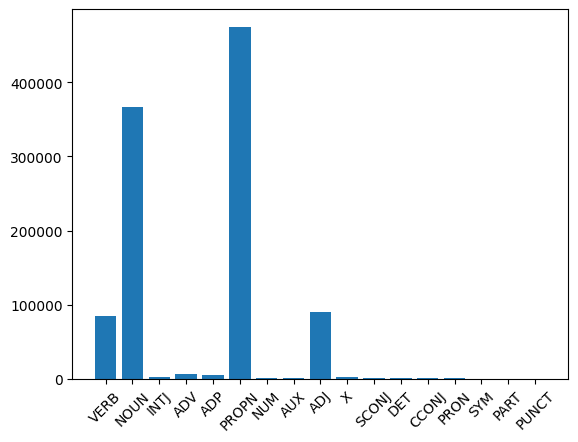

In [20]:
plt.bar(final_dict.keys(), final_dict.values())
plt.xticks(rotation=45)
plt.show()

## item c

In [21]:
selected_entities = []
for doc in converted_data:
    for ent in doc.ents:
        if ent.label_ in ['PERSON', 'LOC']:
            selected_entities.append(ent.text)
selected_entities

['destin',
 'ryokan riad',
 'park homestay',
 'cater accommod tini',
 'wuchang saint eval great',
 'hrvatski srpski',
 'properti lonavala',
 'properti bangalor',
 'destin embrac',
 'ryokan ryokan riad riad',
 'homestay homestay',
 'luxuri tent luxuri',
 'cater accommod',
 'cater properti tini',
 'chang book',
 'relat servic',
 'mo tu',
 'sa su',
 'relat',
 'worri season',
 'compani manag',
 'decad plu experi',
 'airlin american eagl airlin',
 'airlin',
 'airlin fulli',
 'septemb compani big partnership',
 'issu',
 'destin info voila',
 'accommod requir',
 'worri expedia',
 'awesom',
 'accommod detail',
 'compani believ',
 'david jone',
 'jun jul aug',
 'averag passeng includ infant',
 'economi remov plu',
 'averag passeng includ infant',
 'lo angel flight',
 'jaipur bangkok',
 'bengaluru kochi',
 'kolkata kochi',
 'kolkata mumbai',
 'bengaluru mumbai',
 'mumbai bengaluru',
 'jaipur bengaluru',
 'kolkata bengaluru',
 'bagdogra bengaluru',
 'kolkata toronto',
 'bengaluru toronto',
 'koch

## item d

In [27]:
persons = {}
for doc in converted_data:
    already_in_doc = []
    for ent in doc.ents:
        text = ent.text
        if ent.label_ in ['PERSON'] and text not in already_in_doc:
            already_in_doc.append(text)
            if text not in persons:
                persons[text] = 1
            else:
                persons[text] += 1
dict(sorted(persons.items(), key=lambda item: item[1], reverse=True))

{'newslett': 190,
 'chang': 112,
 'relat': 81,
 'christma': 67,
 'activ': 60,
 'innov': 58,
 'qualiti': 48,
 'cooki': 40,
 'februari': 36,
 'challeng': 36,
 'issu': 35,
 'fulli': 34,
 'materi': 31,
 'dec': 29,
 'max': 27,
 'mike': 26,
 'donald trump': 24,
 'joe biden': 23,
 'john': 22,
 'safari': 20,
 'subscrib newslett': 20,
 'emerg': 20,
 'societi': 19,
 'joe': 19,
 'johnson': 19,
 'privaci polici': 18,
 'militari': 18,
 'david': 18,
 'extrem': 17,
 'juli': 17,
 'usernam': 17,
 'mm': 16,
 'natur': 16,
 'initi': 16,
 'climat chang': 16,
 'gener': 16,
 'austria azerbaijan': 15,
 'bulgaria burkina': 15,
 'tim': 15,
 'taylor': 15,
 'matt': 15,
 'germani ghana': 14,
 'princip saudi arabia': 14,
 'wolf': 14,
 'diari': 14,
 'relat chang': 14,
 'cooki polici': 13,
 'javascript browser': 13,
 'eu': 13,
 'la vega': 12,
 'jordan kazakhstan': 12,
 'unfortun': 12,
 'kumar': 12,
 'divid': 12,
 'khan': 12,
 'eric': 12,
 'essenti websit': 12,
 'cooki ensur': 12,
 'john le': 12,
 'appli': 11,
 'festi